In [498]:
# 26 Nov 2018
# trying to draw a clock

import matplotlib.pyplot as plt
import numpy as np

# units in radians

def draw_clock(yyyymmdd, clock_color = "xkcd:grey", progress_color = "Spectral", fontsize = 14, ax = None):
    """
    fairly dumb way of drawing a clock, takes input as yyyymmdd and draws a clock
    through drawing some filled circles with contourf in polar plot
    
    the plot will not automatically scale but the "fontsize" number can be modified
    accordingly to make it scale, so test this with some sample images first
    
    input:
       yyyymmdd         string of yyyy/mm/dd, how you grab from data is up to you
       clock_color      default is "xkcd:grey", modify accordingly as RGB, hex, python words etc.
       progress_color   default is orange progress lime background from "Spectral", change it
                          by inputing a colormap if you like
       fontsize         default 14, modify this depending on clock size
       ax               subplot axes to plot it, suggestion is in the parent axes do say
       
                          a = plt.axes([0.95, .6, .2, .2], polar = True)
                          draw_clock("19510630", ax = a, fontsize = 10)
    """
    
    if ax is None:
        ax = plt.axes(projection = 'polar')

    # set up the clock as a circle
    ax.set_theta_offset(np.pi / 2.0)    # start counting at 12 o'clock
    ax.set_theta_direction("clockwise") # go clockwise
    ax.set_xticks([])                   # kill all the ticks
    ax.set_rticks([])
    ax.set_rlim(0, 1)                   # set the clockface

    ax.set_facecolor(clock_color)

    # set up an array to plot the invariant parts
    outer_line = 0.70
    inner_line = 0.45
    theta_vec = np.linspace(0, 2 * np.pi, 71)
    r_vec = np.linspace(inner_line, outer_line, 31)
    theta, r = np.meshgrid(theta_vec, r_vec)

    # set up some settings (hand tuned for now...)
    months = {}
    months["label"] = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
    months["theta"] = np.arange(0, 12, 1) * np.pi / 6.0 + np.pi / 12.0
    months["days"] = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31] # assume no leap years

    # work out the date in radians
    year  = int(yyyymmdd[0:4])
    month = int(yyyymmdd[4:6])
    day   = int(yyyymmdd[6::])
    if (year > 9999) or (year < 0):
        print("year grabbed is %.4d and is out of bounds?" % year)
        return
    if (month > 12) or (month < 0):
        print("month grabbed is %.2d and is out of bounds?" % month)
        return
    if (day > months["days"][month - 1]) or (day < 0):
        print("month grabbed is %.2d" % month)
        print("but date grabbed is %.2d so is out of bounds?" % day)
        return
    date_in_rad = (month - 1) * np.pi / 6.0 + (day / months["days"][month - 1]) * np.pi / 6.0

    ax.plot(theta_vec, inner_line * np.ones(theta_vec.shape), 'k')
    ax.plot(theta_vec, outer_line * np.ones(theta_vec.shape), 'k')
    ax.plot(theta_vec, 1.0 * np.ones(theta_vec.shape), 'k', linewidth = 2)
    ax.text(3 * np.pi / 2.0, 0.0, "%.4d" % year, 
            ha = 'center', va = 'center', fontsize = fontsize)
    for month in range(12):
        ax.plot([month * np.pi / 6.0, month * np.pi / 6.0], [outer_line, 1.0], 'k-')
        ax.text(months["theta"][month], 0.85, months["label"][month], 
                ha = 'center', va = 'center', fontsize = fontsize)

    filled_region = np.where(theta < date_in_rad + 0.01, -1, 1) # ad a little increment to push the contour over
    ax.contourf(theta, r, filled_region, levels = np.linspace(-2, 2, 3), cmap = progress_color)

def hex_to_rgb(color_hex):
    
    color_rgb = tuple(int(color_hex[i:i+2], 16) / 255 for i in (0, 2 ,4))
    
    return color_rgb

def hex_duple_colormap(color_hex1, color_hex2, sample = False):
    
    from matplotlib.colors import LinearSegmentedColormap
    
    colors = [hex_to_rgb(color_hex1), hex_to_rgb(color_hex2)]
    cmap = LinearSegmentedColormap.from_list("murp", colors, N = 2)
    
    if sample:
        x = np.arange(0, np.pi, 0.1)
        y = np.arange(0, 2*np.pi, 0.1)
        X, Y = np.meshgrid(x, y)
        Z = np.cos(X) * np.sin(Y) * 10

        ax = plt.axes()
        im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap = cmap)
        fig.colorbar(im, ax = ax)
        plt.show()
    
    return cmap

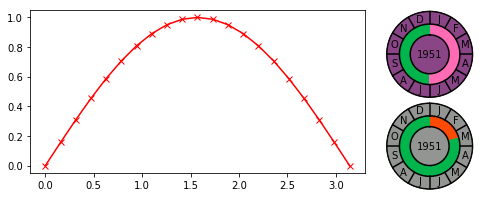

In [499]:
fig = plt.figure(figsize = (6, 3))
ax = plt.subplot(1, 1, 1)
ax.plot(np.linspace(0, np.pi, 21), np.sin(np.linspace(0, np.pi, 21)), 'rx-')
ax1 = plt.axes([0.85, 0.475, .4, .4], polar = True)
draw_clock("19510630", ax = ax1, fontsize = 10, clock_color = hex_to_rgb(eggplant), progress_color = cmap)
ax2 = plt.axes([0.85, 0.05, .4, .4], polar = True)
draw_clock("19510315", ax = ax2, fontsize = 10, progress_color = hex_duple_colormap(b_orange, shamrock))

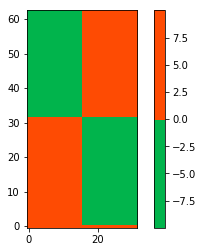

In [500]:
bubblegum = "ff6cb5"
shamrock  = "01b44c"
eggplant  = "894585"
b_orange  = "fe4b03"

_ = hex_duple_colormap(shamrock, b_orange, sample = True)